In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
from datetime import timedelta

In [4]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import pipeline, preprocessing

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
df=pd.read_csv('start-up.csv',index_col=0 )

In [14]:
df.columns

Index(['permalink', 'company_name', 'category_code', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ave_inf_y'],
      dtype='object')

In [17]:
df

,permalink,company_name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,ve_funded_daysop,CA,NY,MA,TX,WA,cr_funded_at,cr_raised_amount_usd,cr_funded_daysop,ave_inf_y
0,/company/waywire,#waywire,news,1750000,operating,USA,NY,New York,New York,1,...,0.0,0,1,0,0,0,0,0.0,0.0,22.191313
1,/company/1000memories,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,...,0.0,1,0,0,0,0,0,0.0,0.0,21.025859
2,/company/100plus,100Plus,analytics,1250000,acquired,USA,CA,SF Bay,San Francisco,2,...,47.0,1,0,0,0,0,0,0.0,0.0,21.721111
3,/company/1010data,1010data,software,35000000,operating,USA,NY,New York,New York,1,...,3719.0,0,1,0,0,0,0,0.0,0.0,16.393939
4,/company/121nexus,121nexus,software,719000,operating,USA,RI,Providence,Providence,4,...,0.0,0,0,0,0,0,0,0.0,0.0,21.721111
5,/company/1366-technologies,1366 Technologies,manufacturing,48950000,operating,USA,MA,Boston,Lexington,6,...,1129.0,0,0,1,0,0,0,0.0,0.0,19.943636
6,/company/140-proof,140 Proof,advertising,5500000,operating,USA,CA,SF Bay,San Francisco,2,...,0.0,1,0,0,0,0,0,0.0,0.0,21.025859
7,/company/140fire,140Fire,advertising,500000,operating,USA,CA,Los Angeles,Santa Monica,1,...,0.0,1,0,0,0,0,0,0.0,0.0,21.025859
8,/company/15five,15Five,software,1200000,operating,USA,CA,SF Bay,San Francisco,2,...,625.0,1,0,0,0,0,0,0.0,0.0,21.721111
9,/company/169-st,169 ST.,games_video,50000,operating,USA,FL,Orlando,Lake Mary,1,...,0.0,0,0,0,0,0,0,0.0,0.0,20.670404


In [18]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + sa_funded_daysop + sa_raised_amount_usd
                + ag_funded_daysop + ag_raised_amount_usd
                + cr_funded_daysop + cr_raised_amount_usd''',data=df,return_type='dataframe')

In [19]:
X1=X1.drop(columns='Intercept')

In [22]:
X1


,category_code[T.analytics],category_code[T.automotive],category_code[T.biotech],category_code[T.cleantech],category_code[T.consulting],category_code[T.design],category_code[T.ecommerce],category_code[T.education],category_code[T.enterprise],category_code[T.fashion],...,WA,founded_month,first_funding_dayinop,ave_inf_y,sa_funded_daysop,sa_raised_amount_usd,ag_funded_daysop,ag_raised_amount_usd,cr_funded_daysop,cr_raised_amount_usd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,29.0,22.191313,29.0,1750000.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,-181.0,21.025859,230.0,2520000.0,-181.0,15000.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,47.0,21.721111,-15233.0,0.0,75.0,750000.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3719.0,16.393939,-10957.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,122.0,21.721111,-15254.0,0.0,122.0,569000.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,451.0,19.943636,451.0,12400000.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-194.0,21.025859,-194.0,3000000.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,124.0,21.025859,-14610.0,0.0,124.0,500000.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,245.0,21.721111,-15095.0,0.0,245.0,200000.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,17.0,20.670404,-14379.0,0.0,17.0,50000.0,0.0,0.0


In [23]:
y1['status[acquired]'].sum()/len(y1)

0.12341536167039523

In [24]:
y1_ac=y1['status[acquired]']

0.5797482993197279


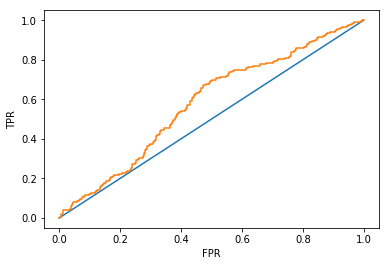

In [25]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)
log_ac = LogisticRegression()
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)


plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac,tpr1_ac)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc1_ac)

In [26]:
y1['status[ipo]'].sum()/len(y1)

0.023738503604275416

In [27]:
y1_ipo=y1['status[ipo]']

0.5435668789808918


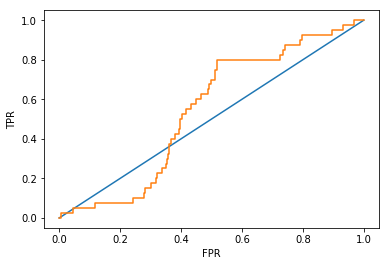

In [28]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)
log_ipo = LogisticRegression()
log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo,tpr1_ipo)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc1_ipo)

In [29]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

log_ac_n=pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ( 'log', LogisticRegression())
])

log_ac_n.fit(X1_train,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac_n, tpr1_ac_n)
print(roc_auc1_ac_n)

0.7454625850340136


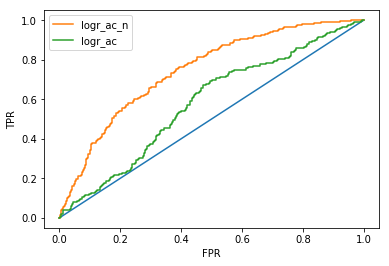

In [30]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best');


In [31]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test =train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)

log_ipo_n=pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ( 'log', LogisticRegression(penalty='l1'))
])

log_ipo_n.fit(X1_train,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)
print(roc_auc1_ipo_n)

0.8405573248407643


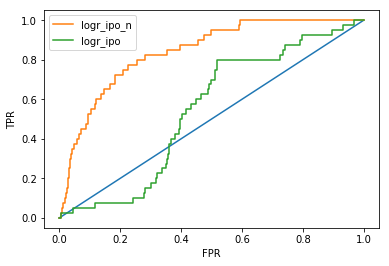

In [32]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ipo_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ipo')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best');

In [33]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

log_ac_n=pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ( 'log', LogisticRegression(penalty='l1'))
])

log_ac_n.fit(X1_train,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac_n, tpr1_ac_n)
print(roc_auc1_ac_n)

0.745982993197279


In [34]:
log_ac_n.named_steps['log'].coef_[0]

array([-5.81138869e-02, -6.94754668e-03, -1.23311121e-01, -7.23239236e-02,
       -6.01874837e-02, -8.27733528e-02, -1.18755933e-01, -3.97970894e-02,
        2.70950512e-02,  1.72553469e-02, -4.64376061e-02, -4.60457437e-03,
       -3.24178472e-02, -7.59935505e-02, -6.88367254e-02, -5.65300370e-02,
       -4.69157485e-02, -1.14043855e-01, -1.44523706e-01,  4.42750469e-02,
        8.26041238e-02,  2.23131329e-02, -1.58283083e-01,  4.81087609e-02,
        1.15116873e-03, -2.16591253e-01, -4.21798819e-02, -8.21707048e-02,
       -2.27834788e-02, -1.82113063e-02, -6.97883047e-02, -2.47306718e-02,
        2.30348297e-02,  1.36386963e-02, -3.14421859e-02, -2.12038512e-02,
       -5.25677436e-02,  1.53605863e-03,  3.95506628e-02,  1.46983822e-01,
        2.47244891e-01,  1.54465247e-01,  1.12765240e-01,  4.85113320e-02,
        9.66825042e-02,  2.14670170e-02, -1.02303697e+00, -1.30063934e+00,
        9.76112425e-02, -4.31663683e-02, -5.73212725e-02,  1.47837245e-02,
       -1.14362221e-02, -

0.6268990400936305


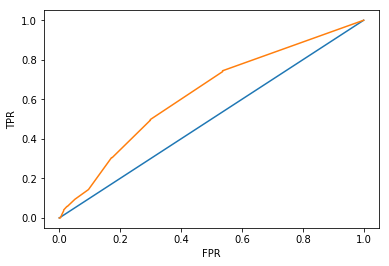

In [35]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
randomforest_ac = RandomForestClassifier()
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr2_ac,tpr2_ac)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc2_ac)

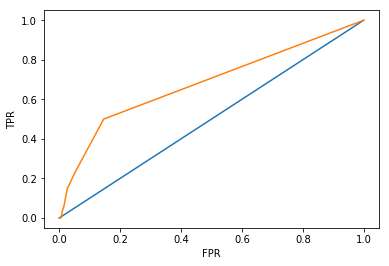

In [36]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
randomforest_ipo = RandomForestClassifier()
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr2_ipo,tpr2_ipo)
plt.xlabel('FPR')
plt.ylabel('TPR');

  

In [37]:
def rforest(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    randomforest_ipo = RandomForestClassifier()
    randomforest_ipo.fit(X1_train,y1_ipo_train)
    
    y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)
    
    y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [38]:
def rforest_afew_times(X1, y1_ipo, n=10):
    return (pd.DataFrame([rforest(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [39]:
rforest_afew_times(X1, y1_ac, n=10)

Test auc     0.640212
Train auc    0.999353
dtype: float64

In [40]:
rforest_afew_times(X1, y1_ipo, n=10)

Test auc     0.699176
Train auc    0.999854
dtype: float64

In [41]:
def logregn(X1,y1_ac):
    
    X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)

    log_ac_n=pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'log', LogisticRegression())
    ])

    log_ac_n.fit(X1_train,y1_ac_train)
    
    y_score=log_ac_n.predict_proba(X1_test)[:,1]
    
    fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
    roc_auc1_ac_n = auc(fpr1_ac_n, tpr1_ac_n)
    
    y_score=log_ac_n.predict_proba(X1_train)[:,1]
    fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
    roc_auc1_ac_n_train = auc(fpr1_ac_n_train, tpr1_ac_n_train)
    
    return roc_auc1_ac_n, roc_auc1_ac_n_train

In [42]:
def logregn_afew_times(X1, y1_ipo, n=10):
    return (pd.DataFrame([logregn(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [43]:
logregn_afew_times(X1, y1_ac, n=10)

Test auc     0.739302
Train auc    0.763171
dtype: float64

In [44]:
logregn_afew_times(X1, y1_ipo, n=10)

Test auc     0.831689
Train auc    0.881238
dtype: float64

In [45]:
def cv_GBC(X1, y1_ipo,maxfeatures):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    GBC = GradientBoostingClassifier(learning_rate=0.1, max_features=maxfeatures,n_estimators=300)
    GBC.fit(X1_train,y1_ipo_train)
    
    y_score=GBC.predict_proba(X1_test)[:,1]
    fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)
    
    y_score_train=GBC.predict_proba(X1_train)[:,1]
    fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc3_ipo,roc_auc3_ipo_train

In [46]:
def cv_GBC_afew_times(X1, y1_ipo, n=10,maxfeatures=1):
    return (pd.DataFrame([cv_GBC(X1, y1_ipo,maxfeatures) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [47]:
cv_GBC_afew_times(X1, y1_ac, n=10,maxfeatures=4)

Test auc     0.750392
Train auc    0.847327
dtype: float64

In [48]:
cv_GBC_afew_times(X1, y1_ipo, n=10,maxfeatures=4)

Test auc     0.832049
Train auc    0.957928
dtype: float64

In [49]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
GBC_ac = GradientBoostingClassifier(learning_rate=0.1, max_features=4,n_estimators=200)
GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

In [50]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
GBC_ipo = GradientBoostingClassifier(learning_rate=0.1, max_features=4,n_estimators=200)
GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

In [51]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
SVC1 =pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('SvC', SVC(probability=True))
])

SVC1.fit(X1_train,y1_ipo_train)

y_score=SVC1.predict_proba(X1_test)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)


In [52]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
SVC1 =pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('SvC', SVC(probability=True))
])

SVC1.fit(X1_train,y1_ac_train)

y_score=SVC1.predict_proba(X1_test)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

In [53]:
def mod_SVC(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    SVC1 =pipeline.Pipeline([
            ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
            ( 'SvC', SVC(probability=True))
        ])

    SVC1.fit(X1_train,y1_ipo_train)

    y_score=SVC1.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=SVC1.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [54]:
def mod_SVC_afew_times(X1, y1_ipo,n=10):
    return (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [55]:
mod_SVC_afew_times(X1, y1_ipo,n=10)

Test auc     0.751806
Train auc    0.928794
dtype: float64

In [56]:
mod_SVC_afew_times(X1, y1_ac,n=10)

Test auc     0.610965
Train auc    0.836068
dtype: float64

In [57]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)

parameters = {'kernel':('linear', 'rbf','poly'), 'gamma': np.logspace(-2, 2, 10),'C':[1, 10],'probability':[True]}

SVC1 =pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'SvC', SVC(kernel='linear', probability=True))
    ])

SVC1.fit(X1_train,y1_ipo_train)

y_score=SVC1.predict_proba(X1_test)[:,1]
fpr5_ipo, tpr5_ipo,_ = roc_curve(y1_ipo_test, y_score)


X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
SVC1 =pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'SvC', SVC(kernel='linear', probability=True))
    ])

SVC1.fit(X1_train,y1_ac_train)

y_score=SVC1.predict_proba(X1_test)[:,1]
fpr5_ac, tpr5_ac,_ = roc_curve(y1_ac_test, y_score)

In [58]:
def mod_SVC(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    SVC1 =pipeline.Pipeline([
            ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
            ( 'SvC', SVC(kernel='linear', probability=True))
        ])

    SVC1.fit(X1_train,y1_ipo_train)

    y_score=SVC1.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=SVC1.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [59]:
mod_SVC_afew_times(X1, y1_ipo,n=10)

Test auc     0.518930
Train auc    0.537822
dtype: float64

In [60]:
mod_SVC_afew_times(X1, y1_ac,n=10)

Test auc     0.482827
Train auc    0.493194
dtype: float64

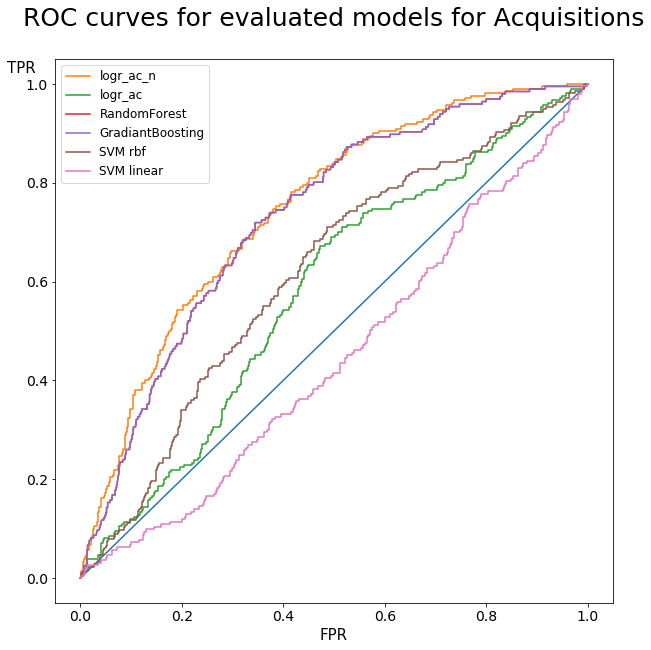

In [61]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr3_ac,tpr3_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM rbf')
plt.plot(fpr5_ac,tpr5_ac,label='SVM linear')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


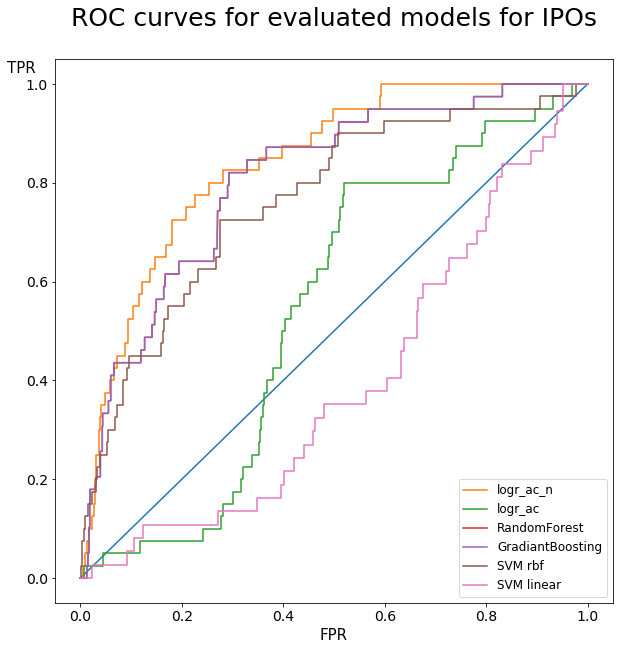

In [62]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ac_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr3_ipo,tpr3_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM rbf')
plt.plot(fpr5_ipo,tpr5_ipo,label='SVM linear')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [63]:
GBC_ac.feature_importances_ 

array([5.61361649e-03, 2.18959151e-03, 1.20264347e-02, 8.17068942e-03,
       4.90238589e-03, 1.98142421e-05, 5.01761880e-03, 3.90258149e-03,
       6.04876266e-03, 6.69294520e-03, 7.88888669e-03, 1.11255637e-02,
       5.57544489e-03, 3.80986790e-03, 1.68191656e-03, 4.37844881e-03,
       0.00000000e+00, 1.38608889e-02, 1.42689433e-02, 5.26060670e-03,
       1.54962566e-02, 5.67238636e-03, 7.43093373e-03, 6.81500196e-03,
       4.68840125e-03, 5.60090706e-03, 4.58509709e-03, 1.52552481e-03,
       1.40130673e-03, 4.21924162e-03, 6.26459193e-04, 5.26406780e-03,
       6.53959598e-03, 4.54513184e-03, 3.88095979e-03, 5.14683009e-03,
       2.48984680e-03, 3.64952617e-04, 1.13258989e-02, 1.93506288e-02,
       2.69121551e-02, 1.33114433e-02, 1.95044790e-02, 7.06526811e-03,
       1.45931607e-02, 3.79355842e-02, 1.24169310e-01, 1.81293700e-01,
       1.43170129e-01, 9.12025472e-02, 6.05711908e-02, 4.07446744e-02,
       1.21917453e-04, 4.16096620e-09])

In [64]:
np.argmax(GBC_ac.feature_importances_ , axis=None, out=None)

47

In [65]:
GBC_ac.feature_importances_ [47]

0.18129370010921622

In [66]:
Var_Imp=[]

In [67]:
len(GBC_ac.feature_importances_ )

54

In [68]:
VarImp=GBC_ac.feature_importances_ 

In [69]:
for i in range(1,len(VarImp)):
    ind=np.argmax(VarImp)
    Var_Imp.append(X1.columns[ind])
    VarImp[ind]=0


In [77]:
Var_Imp[:10]

['ave_inf_y',
 'sa_funded_daysop',
 'first_funding_dayinop',
 'sa_raised_amount_usd',
 'ag_funded_daysop',
 'ag_raised_amount_usd',
 'founded_month',
 'CA',
 'MA',
 'category_code[T.web]']

In [88]:
y_ipo_pred=GBC_ipo.predict_proba(X1_test)[:,1]>0.8

cm_ipo=confusion_matrix(y1_ipo_test, y_ipo_pred)
cm_ipo

array([[1572,    1],
       [  36,    1]])

In [86]:
print(classification_report(y1_ipo_test, y_ipo_pred))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1573
        1.0       0.50      0.03      0.05        37

avg / total       0.97      0.98      0.97      1610



In [73]:
y_ac_pred=GBC_ac.predict(X1_test)

cm_ac=confusion_matrix(y1_ac_test, y_ac_pred)
cm_ac

array([[1416,    1],
       [ 190,    3]])

In [74]:
print(classification_report(y1_ac_test, y_ac_pred))

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94      1417
        1.0       0.75      0.02      0.03       193

avg / total       0.87      0.88      0.83      1610



In [75]:
y_ac_predlogn=log_ac_n.predict(X1_test)

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[1411,    6],
       [ 188,    5]])

In [76]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94      1417
        1.0       0.45      0.03      0.05       193

avg / total       0.83      0.88      0.83      1610



In [80]:
GBC_ipo.predict_proba(X1_test)[:,1]>0.3

array([False, False, False, ..., False, False, False])

In [81]:
sum(GBC_ipo.predict_proba(X1_test)[:,1]>0.3)

12